In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mplcolors


import scienceplots
plt.style.use(["science", "no-latex"])

from cmap import Colormap
cmap = Colormap('crameri:batlow').to_mpl()

In [3]:
folder = "experiments/10d-poisson/results"

In [ ]:
lm_time = np.load(folder+"/lm_time.npy")
lm_l2err = np.load(folder+"/lm_l2err.npy")
lm_loss = np.load(folder+"/lm_loss.npy")
lm_lambda = np.load(folder+"/lm_lambda.npy")
lm_searchdirnorm = np.load(folder+"/lm_searchdirnorm.npy")
lm_svs = np.load(folder+"/lm_svs.npy")
lm_u_pred = np.load(folder+"/lm_u_pred.npy")
lm_u_solution = np.load(folder+"/lm_u_solution.npy")
lm_u_pred_start = np.load(folder+"/lm_u_pred_start.npy")

bfgs_u_pred = np.load(folder+"/bfgs_u_pred.npy")
bfgs_time = np.load(folder+"/bfgs_time.npy")
bfgs_l2err = np.load(folder+"/bfgs_l2err.npy")
bfgs_loss = np.load(folder+"/bfgs_loss.npy")

agg_loss = lm_loss[:300]
agg_time = lm_time[:300]
agg_l2   = lm_l2err[:300]

plateau_loss = lm_loss[300:]
plateau_time = lm_time[300:]
plateau_l2   = lm_l2err[300:]

agg_time = agg_time - lm_time[0]
plateau_time = plateau_time - lm_time[0]

bfgs_loss = np.insert(bfgs_loss, 0, agg_loss[0], axis=0)
bfgs_time = np.insert(bfgs_time, 0, agg_time[0], axis=0)
bfgs_l2err = np.insert(bfgs_l2err, 0, agg_l2[0], axis=0)


In [5]:
print(lm_u_solution)

[[1.2072     1.2072     1.2072     ... 1.2072     1.2072     1.2072    ]
 [1.2072     1.207262   1.207324   ... 1.21495002 1.21501202 1.21507402]
 [1.2072     1.207324   1.207448   ... 1.22270003 1.22282403 1.22294803]
 ...
 [1.2072     1.21495002 1.22270003 ... 2.17595194 2.18370195 2.19145197]
 [1.2072     1.21501202 1.22282403 ... 2.18370195 2.19151397 2.19932598]
 [1.2072     1.21507402 1.22294803 ... 2.19145197 2.19932598 2.2072    ]]


In [6]:
X, Y = np.meshgrid(np.linspace(0, 1, 128), np.linspace(0, 1, 128))

xs = [0.0, 0.0, 0.64, 0.39, 0.80, 0.85, 0.52, 0.10, 0.48, 0.47]


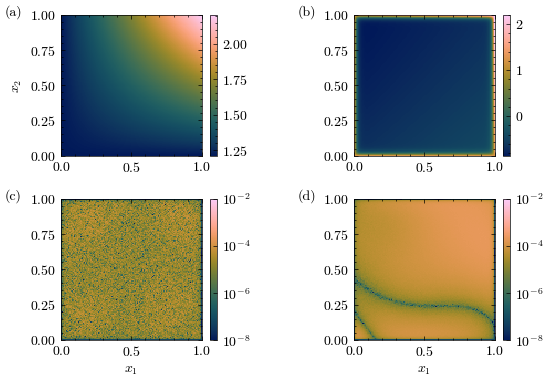

Relative L2 Error: 1.868255473081873e-05


In [31]:
# --- Create a single figure with a 2x2 grid of subplots ---
# figsize is adjusted to accommodate the four plots.
# sharex=True and sharey=True ensure all subplots use the same axis scales for easier comparison.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

# Flatten the 2x2 array of axes for easier indexing
ax1, ax2, ax3, ax4 = axes.flatten()

# --- Plot (a): lm_u_solution ---
ax1.set_aspect("equal")
im1 = ax1.pcolormesh(X, Y, lm_u_pred, cmap=cmap, rasterized=True)
fig.colorbar(im1, ax=ax1, pad=0.03)
ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax1.set_ylabel("$x_2$")

# --- Plot (b): lm_u_pred_start ---
ax2.set_aspect("equal")
im2 = ax2.pcolormesh(X, Y, lm_u_pred_start, cmap=cmap, rasterized=True)
fig.colorbar(im2, ax=ax2, pad=0.03)
ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))

# --- Plot (d): Absolute Error ---
lm_error = np.abs(lm_u_solution - lm_u_pred)
# Adding a small epsilon to vmin to avoid issues with zero values in log scale
norm = mplcolors.LogNorm(vmin=1e-8, vmax=1e-2)

ax3.set_aspect("equal")
im3 = ax3.pcolormesh(X, Y, error + 1e-10, norm=norm, cmap=cmap, rasterized=True)
fig.colorbar(im3, ax=ax3, pad=0.03)
ax3.annotate("(c)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax3.set_xlabel("$x_1$")


# --- Plot (d): Absolute Error ---
bfgs_error = np.abs(lm_u_solution - bfgs_u_pred)
# Adding a small epsilon to vmin to avoid issues with zero values in log scale
norm = mplcolors.LogNorm(vmin=1e-8, vmax=1e-2)

ax4.set_aspect("equal")
im4 = ax4.pcolormesh(X, Y, bfgs_error + 1e-10, norm=norm, cmap=cmap, rasterized=True)
fig.colorbar(im4, ax=ax4, pad=0.03)
ax4.annotate("(d)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax4.set_xlabel("$x_1$")


# --- Finalize and Show/Save ---
# Adjust layout to prevent labels/titles from overlapping
plt.tight_layout(pad=1.0)

# Save the entire figure containing all four plots
fig.savefig(folder + "/lm_all_plots.pdf", format="pdf", bbox_inches='tight')

# Display the figure
plt.show()

# You can still calculate the error metric separately
rel_l2_error = np.linalg.norm(error) / np.linalg.norm(lm_u_solution)
print(f"Relative L2 Error: {rel_l2_error}")

/tmp/ipykernel_853336/1608913747.py:57: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


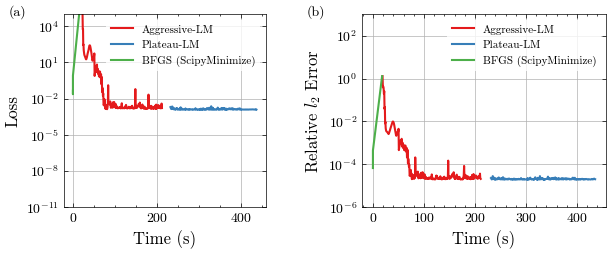

In [36]:
c1 = "#E41A1C"
c2 = "#377EB8"
c3 = "#4DAF4A"
c4 = "#984EA3"

fig = plt.figure(figsize=(7, 2.5))

# Create a GridSpec with 1 row and 3 columns to achieve a 1/3 and 2/3 ratio
gs = gridspec.GridSpec(1, 13, figure=fig)

# Add subplots to the figure using the GridSpec
# The left plot occupies the first column (1/3 width)
ax1 = fig.add_subplot(gs[0, 0:5])
# The right plot occupies the remaining two columns (2/3 width)
ax2 = fig.add_subplot(gs[0, 7:])

# --- Plot 1: Loss vs. Time ---
ax1.plot(agg_time, agg_loss, color=c1, linestyle='-', linewidth=1.5, label="Aggressive-LM")
ax1.plot(plateau_time, plateau_loss, color=c2, linestyle='-', linewidth=1.5, label="Plateau-LM")
ax1.plot(bfgs_time, bfgs_loss, color=c3, linestyle='-', linewidth=1.5, label="BFGS (ScipyMinimize)")

# ax1.plot(poisson_agg_then_plateauBFGS_time[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4], poisson_agg_then_plateauBFGS_loss[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4],
        #  color=c1, linestyle='-', linewidth=1.5, label="BFGS")
ax1.set_yscale('log')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel(r'Loss', fontsize=12)
ax1.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none', loc=1)
ax1.grid()
ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax1.set_ylim([1e-11, 1e5])

# --- Plot 2: Relative l2 Error vs. Time ---
ax2.plot(agg_time, agg_l2, color=c1, linestyle='-', linewidth=1.5, label="Aggressive-LM")
ax2.plot(plateau_time, plateau_l2, color=c2, linestyle='-', linewidth=1.5, label="Plateau-LM")
ax2.plot(bfgs_time, bfgs_l2err, color=c3, linestyle='-', linewidth=1.5, label="BFGS (ScipyMinimize)")


# ax2.plot(poisson_agg_then_plateauBFGS_time[::4], poisson_agg_then_plateauBFGS_l2err[::4], color=c1, linestyle='-', linewidth=1.5, label="BFGS")
# ax2.scatter(263, 1.04e-4, color=c3, marker="o", linewidth=1.5, label="BFGS (Kiyani et. al)")
# ax2.scatter(171, 4.04e-5, color=c4, marker="v", linewidth=1.5, label="SSBroyden (Kiyani et. al)")
ax2.set_yscale('log')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel(r'Relative $l_2$ Error', fontsize=12)
ax2.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
ax2.grid()
ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax2.set_ylim([1e-6, 1e3])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig("2dlosses.pdf", format="pdf")
plt.show()